In [1]:
from defectlib import merge_datasets
from defectlib import Config
from matplotlib import image
from IPython.display import Image
import matplotlib.pyplot as plt
import defectlib
import cv2
import numpy as np
%matplotlib inline

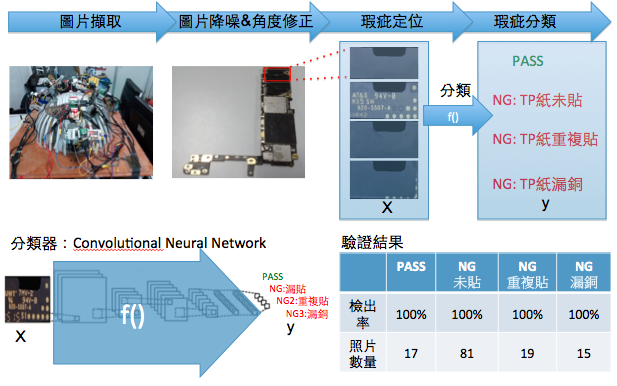

In [2]:
Image(filename='./images/defect_overview.png')

## 原始檔案

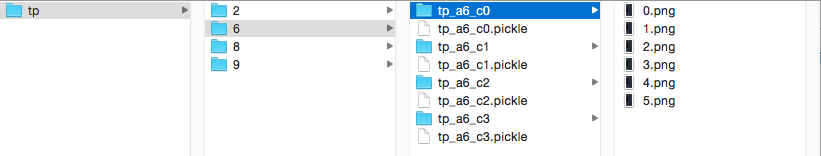

In [3]:
Image(filename='./images/image_files.png')

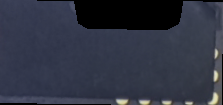

In [4]:
Image(filename='./defect_tensors/tp/9/tp_a9_c3/1.png')

In [5]:
testImage = cv2.imread('./defect_tensors/tp/9/tp_a9_c1/1.png')

In [6]:
testImage

array([[[104,  79,  79],
        [106,  81,  81],
        [104,  81,  81],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[105,  82,  82],
        [107,  84,  84],
        [108,  87,  86],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[107,  87,  86],
        [109,  88,  86],
        [111,  90,  88],
        ..., 
        [ 92,  82,  79],
        [ 90,  81,  77],
        [ 95,  82,  80]],

       ..., 
       [[100,  81,  87],
        [104,  83,  85],
        [106,  84,  85],
        ..., 
        [ 98,  98, 103],
        [103, 100,  99],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ..., 
        [ 97,  98, 103],
        [101, 101, 100],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ..., 
        [ 99,  96,  99],
        [101,  95,  98],
        [  0,   0,

In [7]:
testImage.shape

(105, 223, 3)

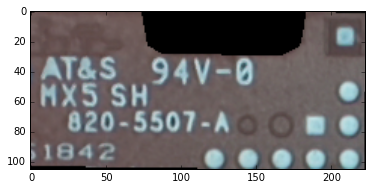

In [8]:
plt.imshow(testImage)

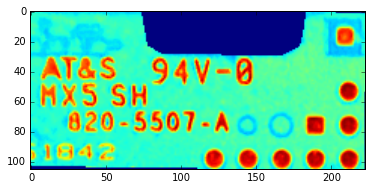

In [9]:
plt.imshow(testImage[:,:,1])

In [10]:
testImage

array([[[104,  79,  79],
        [106,  81,  81],
        [104,  81,  81],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[105,  82,  82],
        [107,  84,  84],
        [108,  87,  86],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[107,  87,  86],
        [109,  88,  86],
        [111,  90,  88],
        ..., 
        [ 92,  82,  79],
        [ 90,  81,  77],
        [ 95,  82,  80]],

       ..., 
       [[100,  81,  87],
        [104,  83,  85],
        [106,  84,  85],
        ..., 
        [ 98,  98, 103],
        [103, 100,  99],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ..., 
        [ 97,  98, 103],
        [101, 101, 100],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ..., 
        [ 99,  96,  99],
        [101,  95,  98],
        [  0,   0,

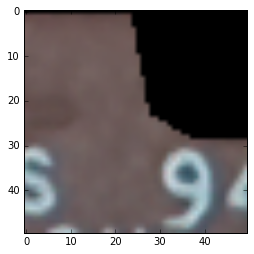

In [11]:
plt.imshow(testImage[0:50, 50:100])

## 影像分類 Step by Step

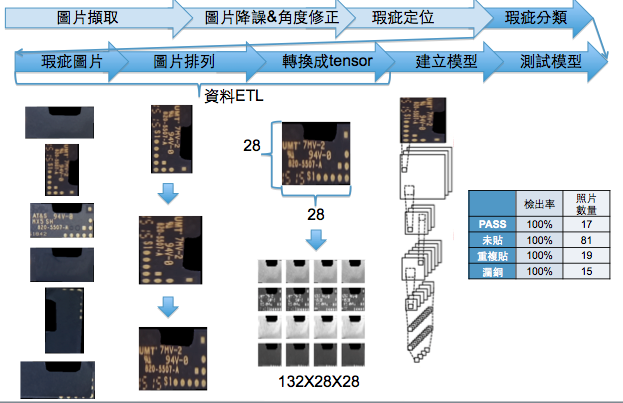

In [12]:
Image(filename='./images/ETL.png')

### Step1. 影像資料ETL

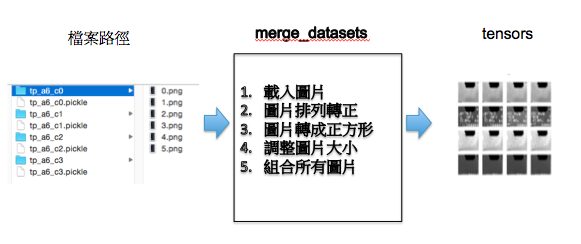

In [13]:
Image(filename='./images/initial_ETL.png')

In [14]:
tensor9, label9 = merge_datasets('./defect_tensors/tp/9/', width=28)

In [15]:
tensor9.shape

(54, 28, 28)

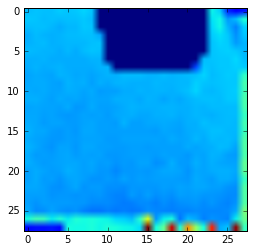

In [16]:
plt.imshow(tensor9[45])

In [17]:
label9

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3])

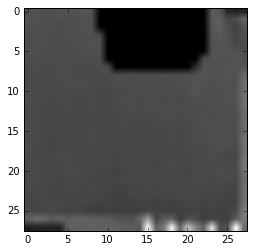

In [18]:
plt.imshow(tensor9[45], cmap='gray')

In [19]:
tensor2, label2 = merge_datasets('./defect_tensors/tp/2a/', width=28)

In [20]:
tensor8, label8 = merge_datasets('./defect_tensors/tp/8/', width=28)

In [21]:
tensor6, label6 = merge_datasets('./defect_tensors/tp/6/', width=28)

### 載入的圖片是否有問題?

In [22]:
from defectlib import display_tensor

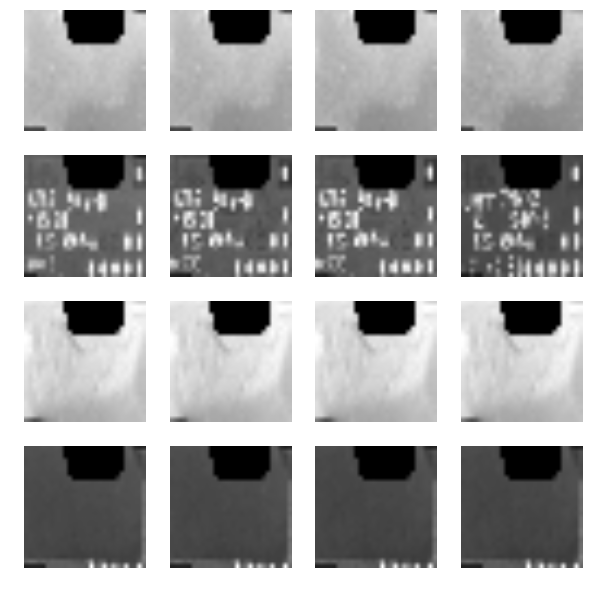

In [23]:
display_tensor(tensor9, label9)

### 合併所有角度的照片

In [24]:
from defectlib import combine_shuffle_tensors

In [25]:
for tensor in (tensor2, tensor6, tensor8, tensor9):
    print tensor.shape

(41, 28, 28)
(28, 28, 28)
(9, 28, 28)
(54, 28, 28)


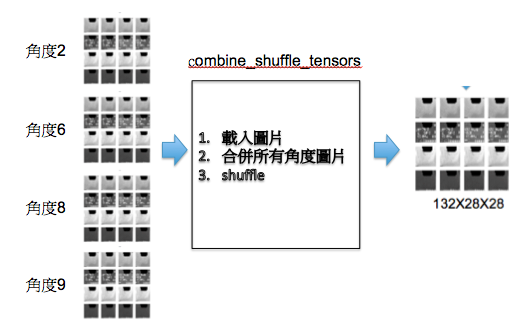

In [26]:
Image(filename='./images/combine_shuffle_tensors.png')

In [27]:
all_tensor, all_label = combine_shuffle_tensors((tensor2, label2), (tensor6, label6), (tensor8, label8), (tensor9, label9))

the final tensor should be 132


In [28]:
for label in set(all_label):
    print 'the number of class {}: {}'.format(label, all_tensor[all_label == label].shape[0])

the number of class 0: 17
the number of class 1: 81
the number of class 2: 19
the number of class 3: 15


In [29]:
all_tensor.shape

(132, 28, 28)

In [30]:
all_label.shape

(132,)

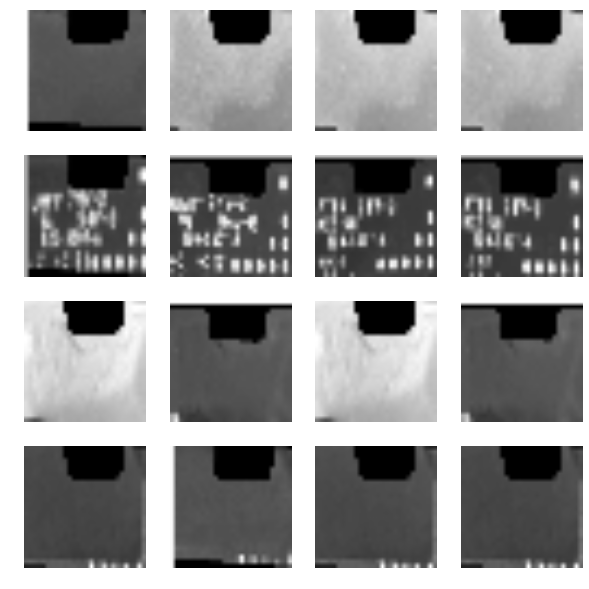

In [31]:
display_tensor(all_tensor, all_label)

### 建立模型

In [32]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


In [33]:
list(set(all_label))

[0, 1, 2, 3]

In [34]:
labels_ohe = np_utils.to_categorical(all_label)

In [35]:
labels_ohe

array([[ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  

In [36]:
all_tensor.shape

(132, 28, 28)

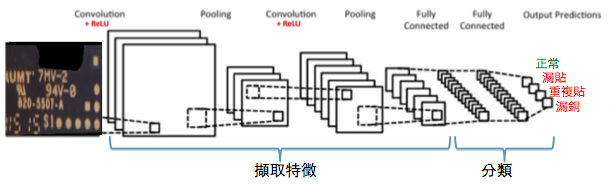

In [37]:
Image(filename='./images/CNN.png')

In [38]:
model = Sequential()

# Convolution2D(number_filters, row_size, column_size, input_shape=(number_channels, img_row, img_col))

model.add(Convolution2D(6, 5, 5, input_shape=(28, 28, 1), border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(16, 5, 5, border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(120, 5, 5))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(84))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))

In [39]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=["accuracy"])

In [40]:
combined_tensor8, combined_label8 = combine_shuffle_tensors((tensor2, label2), (tensor6, label6), (tensor9, label9))

the final tensor should be 123


In [41]:
train_data = combined_tensor8.reshape(combined_tensor8.shape[0], combined_tensor8.shape[1], combined_tensor8.shape[2], 1)

In [42]:
train_data.shape

(123, 28, 28, 1)

In [43]:
train_labels = np_utils.to_categorical(combined_label8)

In [44]:
test_data = tensor8.reshape(tensor8.shape[0], tensor8.shape[1], tensor8.shape[2], 1)

In [45]:
test_labels = np_utils.to_categorical(label8)

In [46]:
all_tensor.shape

(132, 28, 28)

In [47]:
%time
nb_epoch = 10  # try increasing this number
model.fit(train_data, train_labels, batch_sizalidation_data=(test_data, test_labels))
score = model.evaluate(test_data, test_labee=10, nb_epoch=nb_epoch,
          show_accuracy=True, verbose=1, vls, show_accuracy=True, verbose=0)
# print('Test score:', score[0])
# print('Test accuracy:', score[1])

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs


/Users/hadoop1/.virtualenvs/tensorflow/lib/python2.7/site-packages/keras/models.py:610: UserWarning: The "show_accuracy" argument is deprecated, instead you should pass the "accuracy" metric to the model at compile time:
`model.compile(optimizer, loss, metrics=["accuracy"])`
  warnings.warn('The "show_accuracy" argument is deprecated, '


Train on 123 samples, validate on 9 samples
Epoch 1/100
123/123 [==============================] - 0s - loss: 1.1723 - acc: 0.5935 - val_loss: 1.2276 - val_acc: 0.3333
Epoch 2/100
123/123 [==============================] - 0s - loss: 0.7168 - acc: 0.6341 - val_loss: 1.0350 - val_acc: 0.3333
Epoch 3/100
123/123 [==============================] - 0s - loss: 0.5598 - acc: 0.6748 - val_loss: 0.9622 - val_acc: 0.3333
Epoch 4/100
123/123 [==============================] - 0s - loss: 0.4947 - acc: 0.7886 - val_loss: 0.8920 - val_acc: 0.5556
Epoch 5/100
123/123 [==============================] - 0s - loss: 0.4648 - acc: 0.7886 - val_loss: 0.8473 - val_acc: 0.4444
Epoch 6/100
123/123 [==============================] - 0s - loss: 0.4380 - acc: 0.7886 - val_loss: 0.7811 - val_acc: 0.7778
Epoch 7/100
123/123 [==============================] - 0s - loss: 0.3942 - acc: 0.8130 - val_loss: 0.7245 - val_acc: 0.5556
Epoch 8/100
123/123 [==============================] - 0s - loss: 0.3722 - acc: 0.8374 -

/Users/hadoop1/.virtualenvs/tensorflow/lib/python2.7/site-packages/keras/models.py:651: UserWarning: The "show_accuracy" argument is deprecated, instead you should pass the "accuracy" metric to the model at compile time:
`model.compile(optimizer, loss, metrics=["accuracy"])`
  warnings.warn('The "show_accuracy" argument is deprecated, '


In [48]:
for i in range(test_data.shape[0]):
    predict = model.predict_classes(test_data[i:i+1,:,:,:])
    print predict

1/1 [==============================] - 0s
[0]
1/1 [==============================] - 0s
[1]
1/1 [==============================] - 0s
[1]
1/1 [==============================] - 0s
[1]
1/1 [==============================] - 0s
[0]
1/1 [==============================] - 0s
[0]
1/1 [==============================] - 0s
[3]
1/1 [==============================] - 0s
[3]
1/1 [==============================] - 0s
[3]


In [49]:
tensor2_200, label2 = merge_datasets('./defect_tensors/tp/2/', width=200)
tensor6_200, label6 = merge_datasets('./defect_tensors/tp/6/', width=200)
tensor9_200, label9 = merge_datasets('./defect_tensors/tp/9/', width=200)
tensor8_200, label8 = merge_datasets('./defect_tensors/tp/8/', width=200)

OSError: [Errno 2] No such file or directory: './defect_tensors/tp/2/'

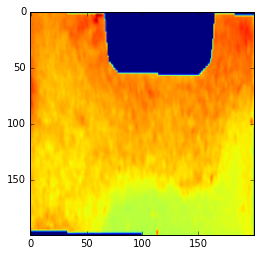

In [87]:
plt.imshow(tensor9_200[0])

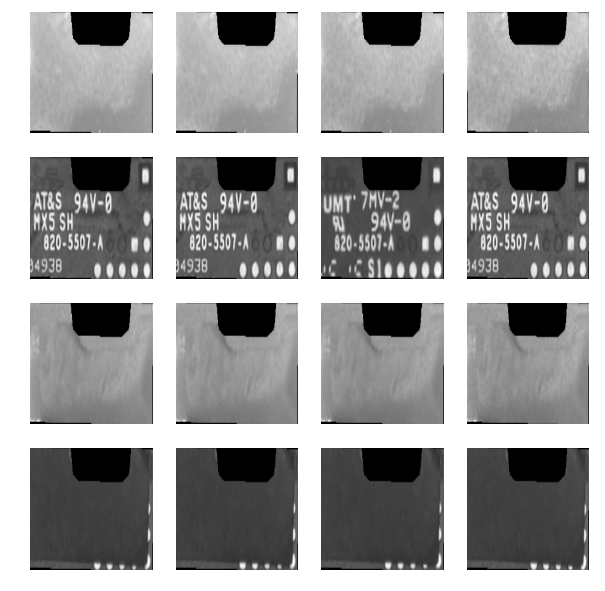

In [88]:
display_tensor(tensor9_200, label9)

In [89]:
train_200, label_200 = combine_shuffle_tensors((tensor2_200, label2), (tensor6_200, label6), (tensor9_200, label9))

the final tensor should be 123


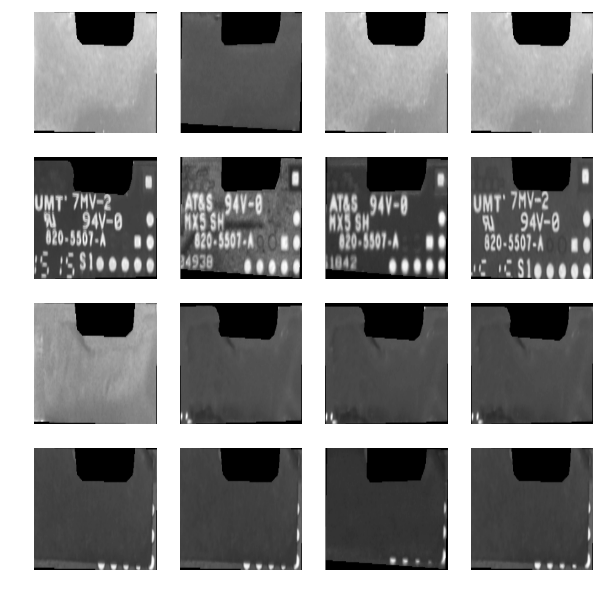

In [199]:
display_tensor(train_200, label_200)

In [103]:
train_data = train_200.reshape(train_200.shape[0], train_200.shape[1], train_200.shape[2], 1)

In [104]:
label_200.shape

(123,)

In [105]:
test_data = tensor8_200.reshape(tensor8_200.shape[0], tensor8_200.shape[1], tensor8_200.shape[2], 1)

In [106]:
train_label = np_utils.to_categorical(label_200)

In [107]:
test_label = np_utils.to_categorical(label8)

In [108]:
train_label.shape

(123, 4)

In [109]:
test_label.shape

(9, 4)

In [110]:
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Flatten, Dense
from keras.layers.convolutional import Convolution2D, MaxPooling2D

In [111]:
model = Sequential()

# Convolution2D(number_filters, row_size, column_size, input_shape=(number_channels, img_row, img_col))

model.add(Convolution2D(6, 5, 5, input_shape=(200, 200, 1), border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(16, 5, 5, border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(120, 5, 5))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(84))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))

In [112]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=["accuracy"])

In [113]:
%time
nb_epoch = 10  # try increasing this number
model.fit(train_data, train_label, batch_size=10, nb_epoch=nb_epoch,
          show_accuracy=True, verbose=1, validation_data=(test_data, test_label))
score = model.evaluate(test_data, test_label, show_accuracy=True, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

CPU times: user 3 µs, sys: 3 µs, total: 6 µs
Wall time: 5.96 µs
Train on 123 samples, validate on 9 samples
Epoch 1/10
123/123 [==============================] - 8s - loss: 1.1743 - acc: 0.5447 - val_loss: 0.9359 - val_acc: 0.3333
Epoch 2/10
123/123 [==============================] - 7s - loss: 0.5172 - acc: 0.7073 - val_loss: 0.8351 - val_acc: 0.4444
Epoch 3/10
123/123 [==============================] - 7s - loss: 0.4668 - acc: 0.8211 - val_loss: 0.7398 - val_acc: 0.8889
Epoch 4/10
123/123 [==============================] - 8s - loss: 0.4123 - acc: 0.8374 - val_loss: 0.6207 - val_acc: 0.7778
Epoch 5/10
123/123 [==============================] - 8s - loss: 0.3758 - acc: 0.8293 - val_loss: 0.4506 - val_acc: 0.8889
Epoch 6/10
123/123 [==============================] - 8s - loss: 0.3309 - acc: 0.8537 - val_loss: 0.3509 - val_acc: 0.8889
Epoch 7/10
123/123 [==============================] - 7s - loss: 0.2261 - acc: 0.9187 - val_loss: 2.1103 - val_acc: 0.3333
Epoch 8/10
123/123 [===========

In [211]:
score = model.evaluate(test_data, test_label, show_accuracy=True, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

('Test score:', 0.89004886150360107)
('Test accuracy:', 0.55555558204650879)


In [146]:
from sklearn.metrics import classification_report

In [148]:
plt.style.use('ggplot')

In [149]:
plt.figure(figsize=(6, 2))
plt.bar(np.arange(4), predict_test_pro[6], align='center', alpha=0.5)
plt.xticks(np.arange(4), (u'PASS', u'NG-NoShow', u'NG-Dup', u'Leak'))
plt.ylabel('Probability')
plt.show()

NameError: name 'np' is not defined

In [125]:
plt.gca?

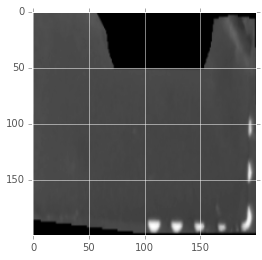

In [135]:
plt.imshow(tensor8_200[-1], cmap='gray')

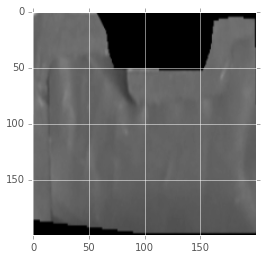

In [118]:
plt.imshow(tensor8_200[4], cmap='gray')

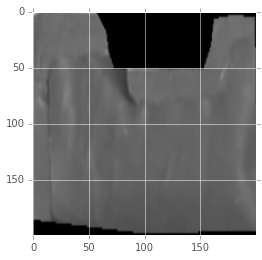

In [120]:
plt.imshow(tensor8_200[5], cmap='gray')

TypeError: There is no line property "kind"

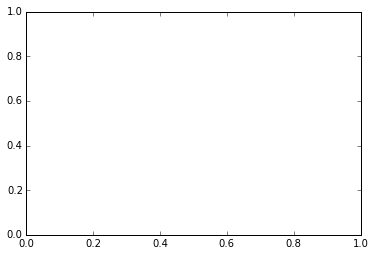

In [88]:
plt.plot(predict_test_pro[0], kind='hist')

In [82]:
predict_test

array([2, 1, 1, 1, 2, 2, 3, 3, 3])

In [83]:
label8

array([0, 1, 1, 1, 2, 2, 3, 3, 3])

In [148]:
train_data.shape

(123, 1, 200, 200)

array([[ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  

In [152]:
label_200.shape

(123,)

In [153]:
label8.shape

(9,)

In [154]:
from sklearn.linear_model import LogisticRegression

In [157]:
train_data.shape

(123, 1, 200, 200)

In [158]:
tensor8_200.shape

(9, 200, 200)

In [159]:
clf = LogisticRegression()
clf.fit(train_data.reshape(train_data.shape[0], train_data.shape[2]*train_data.shape[3]), label_200)
clf.score(tensor8_200.reshape(tensor8_200.shape[0], tensor8_200.shape[1]*tensor8_200.shape[2]), label8)

0.77777777777777779

In [160]:
clf.predict_proba(tensor8_200.reshape(tensor8_200.shape[0], tensor8_200.shape[1]*tensor8_200.shape[2]))

array([[  9.51811038e-01,   3.93822116e-03,   3.93620757e-02,
          4.88866518e-03],
       [  1.91345301e-06,   9.99914137e-01,   1.18686240e-09,
          8.39486425e-05],
       [  1.95387168e-06,   9.99919158e-01,   1.13067737e-09,
          7.88869966e-05],
       [  1.94457674e-06,   9.99927653e-01,   1.03363881e-09,
          7.04017104e-05],
       [  9.09944051e-01,   2.39206535e-03,   8.46388172e-02,
          3.02506642e-03],
       [  9.20145479e-01,   2.25052088e-03,   7.52749023e-02,
          2.32909806e-03],
       [  2.13843588e-02,   2.84563806e-03,   4.42609070e-04,
          9.75327394e-01],
       [  1.93779332e-02,   2.85087697e-03,   4.75353249e-04,
          9.77295837e-01],
       [  2.78354098e-02,   2.93525466e-03,   4.01180470e-04,
          9.68828155e-01]])

In [161]:
clf.predict(tensor8_200.reshape(tensor8_200.shape[0], tensor8_200.shape[1]*tensor8_200.shape[2]))

array([0, 1, 1, 1, 0, 0, 3, 3, 3])

In [162]:
clf.predict_proba(tensor8_200.reshape(tensor8_200.shape[0], tensor8_200.shape[1]*tensor8_200.shape[2])[0])

/Users/hadoop1/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.95181104,  0.00393822,  0.03936208,  0.00488867]])

In [163]:
clf.predict_proba(tensor8_200.reshape(tensor8_200.shape[0], tensor8_200.shape[1]*tensor8_200.shape[2])[4])

/Users/hadoop1/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.90994405,  0.00239207,  0.08463882,  0.00302507]])

In [164]:
clf.predict_proba(tensor8_200.reshape(tensor8_200.shape[0], tensor8_200.shape[1]*tensor8_200.shape[2])[5])

/Users/hadoop1/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.92014548,  0.00225052,  0.0752749 ,  0.0023291 ]])

In [22]:
70000 - 17800

52200

In [23]:
52200 * 0.8

41760.0

In [24]:
41760 - 10000

31760